In [6]:
import tensorflow as tf
from tensorflow.keras import layers, Model, Input
from datetime import date
import numpy as np

# import competition_manager as cm
from competition_manager import *

## Prepare real players data

In [7]:
team_members = ["Andrey Spiridonov", "Andrey Trubicin", "Andrey Larionov", "Veselin", "Fedor", "Andrey Selifonov",
                "Dmitro Ilchenko", "Sergii Kolbasin", "Vlad", "Pavel Karacharov", "Sanya", "Roman", "Ivan", "Denys", "Vitalii Zhebrakovksy",
                "Oleksandr", "Loginov Dmitrii", "Artem Bykov", "Kirill", "Bondarev Yurii", "Gundars Mednis", "Alexandr Mikhailov",
                "Pedro Ispanec", "Dimon Sirnik Lozuk", "Sergey Konovalov", "Vladimir Chavskiy", "Alex Akimov", "Andrey", "Sanya DrugIlchenko", 
                "Vitalik goalkeeper", "Dimon Melkii"]


In [8]:
team_members_with_ids = {idx + 1: tm for idx, tm in enumerate(team_members)}
team_members_with_ids

{1: 'Andrey Spiridonov',
 2: 'Andrey Trubicin',
 3: 'Andrey Larionov',
 4: 'Veselin',
 5: 'Fedor',
 6: 'Andrey Selifonov',
 7: 'Dmitro Ilchenko',
 8: 'Sergii Kolbasin',
 9: 'Vlad',
 10: 'Pavel Karacharov',
 11: 'Sanya',
 12: 'Roman',
 13: 'Ivan',
 14: 'Denys',
 15: 'Vitalii Zhebrakovksy',
 16: 'Oleksandr',
 17: 'Loginov Dmitrii',
 18: 'Artem Bykov',
 19: 'Kirill',
 20: 'Bondarev Yurii',
 21: 'Gundars Mednis',
 22: 'Alexandr Mikhailov',
 23: 'Pedro Ispanec',
 24: 'Dimon Sirnik Lozuk',
 25: 'Sergey Konovalov',
 26: 'Vladimir Chavskiy',
 27: 'Alex Akimov',
 28: 'Andrey',
 29: 'Sanya DrugIlchenko',
 30: 'Vitalik goalkeeper',
 31: 'Dimon Melkii'}

In [ ]:
{1: 'Andrey Spiridonov', #9.75
 2: 'Andrey Trubicin', # 9 
 3: 'Andrey Larionov', #5
 4: 'Veselin', # 6
 5: 'Fedor', # 7
 6: 'Andrey Selifonov', # 6.5
 7: 'Dmitro Ilchenko', #7.5
 8: 'Sergii Kolbasin', # 6.5
 9: 'Vlad', #4
 10: 'Pavel Karacharov', # 7
 11: 'Sanya', # 6
 12: 'Roman', # 6.5
 13: 'Ivan', # 9.25
 14: 'Denys', # 4.5
 15: 'Vitalii Zhebrakovksy', #6.75
 16: 'Oleksandr', #9.25
 17: 'Loginov Dmitrii', # 8.5
 18: 'Artem Bykov', # 7.5
 19: 'Kirill', #9.5
 20: 'Bondarev Yurii', # 5
 21: 'Gundars Mednis', # 5.5
 22: 'Alexandr Mikhailov', # 5.5
 23: 'Pedro Ispanec', #9.5
 24: 'Dimon Sirnik Lozuk', # 8.75
 25: 'Sergey Konovalov' # 6.5,
 26: 'Vladimir Chavskiy' # 8,
 27: 'Alex Akimov' # 7,
 28: 'Andrey' # 7.5,
 29: 'Sanya DrugIlchenko', #8
 30: 'Vitalik goalkeeper', #7,
 31: 'Dimon Melkii' # 6.5}

In [122]:
player_strengths_estimates = np.array([9.5, 9, 5, 6, 8.5, 6.5, 7.5, 6.5,4, 7, 6,6.5, 9.25, 4.5, 6.75, 9.25, 8.5, 
                                       7.5, 9.5, 5, 5.5, 5.5 , 9.5, 8.75, 6.5, 8, 7, 7.5, 8 , 7, 6.5])

In [22]:
len(player_strengths_estimates)

31

In [9]:

def name_to_var(name):
    """Convert a full name string into a valid Python variable name."""
    # Lowercase, replace spaces with underscores, remove non-alphanumeric/underscore characters
    import re
    var = name.lower()
    var = var.replace(' ', '_')
    var = re.sub(r'[^0-9a-z_]', '', var)
    return var

# Define variables dynamically in globals()
for idx, name in team_members_with_ids.items():
    var_name = name_to_var(name)
    globals()[var_name] = idx

In [10]:
historical_cometitions = [
    Competition([loginov_dmitrii, andrey_spiridonov, veselin, alexandr_mikhailov, ivan],
     [kirill, andrey_trubicin, oleksandr, fedor, denys], 11, date(2025, 7, 13 )),

    Competition([roman, oleksandr, andrey_trubicin, denys, andrey_selifonov, veselin],
     [alex_akimov, loginov_dmitrii, andrey_larionov, vitalik_goalkeeper, artem_bykov, andrey_spiridonov], 1, date(2025, 7, 6 )),

    Competition([andrey_selifonov, roman, loginov_dmitrii, andrey_trubicin, kirill, vitalik_goalkeeper],
     [oleksandr, andrey_larionov, sergii_kolbasin, andrey_spiridonov, pavel_karacharov, vlad], 2, date(2025, 6, 22 )),

    Competition([ivan, artem_bykov, andrey_larionov, oleksandr, gundars_mednis, veselin, vitalii_zhebrakovksy, andrey_spiridonov],
     [andrey_trubicin, loginov_dmitrii, dimon_sirnik_lozuk, kirill, alex_akimov, dimon_melkii, roman, sergii_kolbasin], 3, date(2025, 6, 14 )),

    Competition([andrey_trubicin, loginov_dmitrii, roman, sergii_kolbasin, gundars_mednis],
     [andrey_spiridonov, oleksandr, vlad, alex_akimov, vitalii_zhebrakovksy], 3, date(2025, 6, 9 )),

    Competition([ivan, bondarev_yurii, loginov_dmitrii, andrey_larionov, fedor, andrey_spiridonov, roman, dimon_sirnik_lozuk],
     [oleksandr, dimon_melkii, andrey_selifonov, artem_bykov, andrey_trubicin, gundars_mednis, pedro_ispanec, veselin], 3, date(2025, 6, 8 )),

    Competition([andrey_larionov, vitalii_zhebrakovksy, roman, andrey_spiridonov, loginov_dmitrii, sergii_kolbasin],
     [oleksandr, veselin, andrey_selifonov, bondarev_yurii, alex_akimov, andrey_trubicin], 1, date(2025, 5, 25 )),

    Competition([oleksandr, fedor, andrey_spiridonov, loginov_dmitrii, vitalii_zhebrakovksy, pavel_karacharov],
     [pedro_ispanec, andrey, andrey_trubicin, artem_bykov, roman, kirill], 1, date(2025, 5, 4 )), # 14:13

    Competition([loginov_dmitrii, alex_akimov, andrey_larionov, oleksandr, veselin, andrey, andrey_trubicin],
     [bondarev_yurii, artem_bykov, ivan, gundars_mednis, andrey_selifonov, roman, andrey_spiridonov], -2, date(2025, 4, 12 )), # 9:11

    Competition([andrey_larionov, gundars_mednis, andrey_spiridonov, loginov_dmitrii, andrey_selifonov],
     [oleksandr, vitalii_zhebrakovksy, andrey_trubicin, roman, denys], -3, date(2025, 4, 6 )), # 13:16

    
    
    Competition([andrey_trubicin, fedor, gundars_mednis, pedro_ispanec, loginov_dmitrii],
     [ivan, roman, alexandr_mikhailov, andrey_spiridonov, andrey_selifonov], -4, date(2025, 3, 29 )),

    Competition([loginov_dmitrii, dimon_sirnik_lozuk, roman, sanya, andrey_larionov, sergii_kolbasin, roman, denys],
     [veselin, andrey_spiridonov, andrey_trubicin, fedor, pedro_ispanec, artem_bykov, andrey, vlad], -4, date( 2025, 3, 22)),

    Competition([roman, andrey_spiridonov, andrey_trubicin, ivan, pedro_ispanec, denys, artem_bykov],
     [bondarev_yurii, fedor, kirill, oleksandr, andrey_larionov, veselin, loginov_dmitrii], 0, date(2025, 3, 9)),

    Competition([andrey_larionov, oleksandr, andrey_trubicin, veselin, loginov_dmitrii, kirill, roman, pedro_ispanec, pavel_karacharov],
     [ivan, dmitro_ilchenko, andrey_spiridonov, fedor, artem_bykov, sanya, sanya_drugilchenko, andrey_selifonov, alexandr_mikhailov], -1, date(2025, 3, 2)),

    Competition([oleksandr, vlad, andrey_spiridonov, artem_bykov, andrey_larionov, andrey_trubicin, roman, bondarev_yurii],
     [ivan, fedor, loginov_dmitrii, denys, dmitro_ilchenko, andrey_selifonov, sergii_kolbasin, pedro_ispanec], 1, date(2025, 2, 8)),

    Competition([roman, andrey_trubicin, ivan, andrey_spiridonov, veselin, vlad, sergii_kolbasin, andrey_selifonov],
     [denys, oleksandr, dmitro_ilchenko, fedor, artem_bykov, andrey_larionov, loginov_dmitrii, sanya], 0, date(2025, 2, 1)),

    Competition([loginov_dmitrii, alexandr_mikhailov, bondarev_yurii, pavel_karacharov, fedor, dmitro_ilchenko],
     [oleksandr, andrey_trubicin, andrey, andrey_larionov, artem_bykov, vitalii_zhebrakovksy], 0, date(2025, 1, 26)),

    
    Competition([bondarev_yurii, dmitro_ilchenko, roman, andrey_trubicin, andrey_spiridonov, vlad, pavel_karacharov, artem_bykov],
     [loginov_dmitrii, veselin, ivan, oleksandr, vitalii_zhebrakovksy, sergii_kolbasin, denys, andrey_larionov], 0, date(2025, 1, 18)),  # Black legs matter

    Competition([vitalii_zhebrakovksy, loginov_dmitrii, ivan, andrey_spiridonov, andrey_larionov, andrey_trubicin, veselin],
     [sanya, roman, denys, andrey_spiridonov, andrey_selifonov, oleksandr, alex_akimov], 0, date(2024, 12, 29)),
]

In [119]:
len(historical_cometitions)

19

In [11]:
np.random.seed(42)  # for reproducibility

NUM_PLAYERS = len(team_members_with_ids)
MIN_TEAM_SIZE = 5
MAX_TEAM_SIZE = 9
NUM_GAMES = len(historical_cometitions)

teamA_data = np.zeros((NUM_GAMES, MAX_TEAM_SIZE), dtype=int)
teamB_data = np.zeros((NUM_GAMES, MAX_TEAM_SIZE), dtype=int)
labels = np.zeros(NUM_GAMES)

print(f"Shape of teamA_data: {teamA_data.shape}")

for comp_i, competition in enumerate(historical_cometitions):

    teamA_players = competition.team_a
    teamB_players = competition.team_b
    assert len(teamA_players) == len(teamB_players), f"Teams are supposed to be of equal size, Team A:{len(teamA_players)} Team B: {len(teamB_players)}"
    team_size = len(teamA_players)

    labels[comp_i] = competition.score_diff

    # print(teamA_players)
    # print(teamB_players)
    # Pad teams to max size using zeros (which corresponds to masked player)
    teamA_data[comp_i, :team_size] = teamA_players
    teamB_data[comp_i, :team_size] = teamB_players

print("teamA_data shape:", teamA_data.shape)
print("teamB_data shape:", teamB_data.shape)
print("labels shape:", labels.shape)

Shape of teamA_data: (19, 9)
teamA_data shape: (19, 9)
teamB_data shape: (19, 9)
labels shape: (19,)


## Version of the model for real data

In [12]:
teamB_data.shape

(19, 9)

In [14]:
# Constants (adjust as needed)
NUM_PLAYERS = len(team_members_with_ids)
PLAYER_EMB_DIM = 32
NUM_CLASSES = 1  # Binary: win/loss

# Inputs: variable-length teams
teamA_input = Input(shape=(None,), dtype='int32', name='teamA')  # variable-length
teamB_input = Input(shape=(None,), dtype='int32', name='teamB')  # variable-length

# Embedding layer with mask support
player_embedding = layers.Embedding(
    input_dim=NUM_PLAYERS + 1,  # includes 0 for mask
    output_dim=PLAYER_EMB_DIM,
    mask_zero=True,  # Important: enables automatic masking for padding (0 as pad token)
    embeddings_regularizer=tf.keras.regularizers.l2(1e-4),
    name='player_embedding'
)

# Embed team players
teamA_embeds = player_embedding(teamA_input)  # shape: (batch, teamA_len, emb_dim)
teamB_embeds = player_embedding(teamB_input)

# Self-attention block (respects masks automatically if using Functional API)
def self_attention_block(x, name_prefix=''):
    attn_output = layers.MultiHeadAttention(
        num_heads=4,
        key_dim=PLAYER_EMB_DIM,
        dropout=0.1,
        name=f'{name_prefix}_attn'
    )(x, x)
    x = layers.Add(name=f'{name_prefix}_residual')([x, attn_output])
    x = layers.LayerNormalization(name=f'{name_prefix}_norm')(x)
    return x

# Apply attention
teamA_attn = self_attention_block(teamA_embeds, 'teamA')
teamB_attn = self_attention_block(teamB_embeds, 'teamB')

# Global average pooling over valid (non-padded) tokens
# TF handles masking automatically in GlobalAveragePooling1D if mask_zero=True
teamA_vector = layers.GlobalAveragePooling1D(name='teamA_avgpool')(teamA_attn)
teamB_vector = layers.GlobalAveragePooling1D(name='teamB_avgpool')(teamB_attn)

# Matchup modeling (difference vector)
matchup_vector = layers.Subtract(name='matchup_diff')([teamA_vector, teamB_vector])

# Concatenate summary representation
match_input = layers.Concatenate(name='match_features')([teamA_vector, teamB_vector, matchup_vector])

# Feedforward classification head
x = layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4))(match_input)
x = layers.Dropout(0.3)(x)
x = layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4))(x)
x = layers.Dropout(0.3)(x)
# output = layers.Dense(NUM_CLASSES, activation='sigmoid')(x)
output = layers.Dense(1, activation='linear', name='regression_output')(x)

# Final model
model = Model(inputs=[teamA_input, teamB_input], outputs=output)
model.compile(optimizer='adam', 
              loss='mean_squared_error',   # or 'mean_absolute_error'
                metrics=['mean_absolute_error']
             )

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ teamA (InputLayer)  │ (None, None)      │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ teamB (InputLayer)  │ (None, None)      │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ player_embedding    │ (None, None, 32)  │      1,024 │ teamA[0][0],      │
│ (Embedding)         │                   │            │ teamB[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal           │ (None, None)      │          0 │ teamA[0][0]       │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_1         │ (None, None)      │          0 │ teamB[0][0]       │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ teamA_attn          │ (None, None, 32)  │     16,800 │ player_embedding… │
│ (MultiHeadAttentio… │                   │            │ player_embedding… │
│                     │                   │            │ not_equal[0][0],  │
│                     │                   │            │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ teamB_attn          │ (None, None, 32)  │     16,800 │ player_embedding… │
│ (MultiHeadAttentio… │                   │            │ player_embedding… │
│                     │                   │            │ not_equal_1[0][0… │
│                     │                   │            │ not_equal_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ teamA_residual      │ (None, None, 32)  │          0 │ player_embedding… │
│ (Add)               │                   │            │ teamA_attn[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ teamB_residual      │ (None, None, 32)  │          0 │ player_embedding… │
│ (Add)               │                   │            │ teamB_attn[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ teamA_norm          │ (None, None, 32)  │         64 │ teamA_residual[0… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ logical_or          │ (None, None)      │          0 │ not_equal[0][0],  │
│ (LogicalOr)         │                   │            │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ teamB_norm          │ (None, None, 32)  │         64 │ teamB_residual[0… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ logical_or_1        │ (None, None)      │          0 │ not_equal_1[0][0… │
│ (LogicalOr)         │                   │            │ not_equal_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ teamA_avgpool       │ (None, 32)        │          0 │ teamA_norm[0][0], │
│ (GlobalAveragePool… │                   │            │ logical_or[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ teamB_avgpool       │ (None, 32)        │          0 │ teamB_norm[0][0], │
│ (GlobalAveragePool… │                   │            │ logical_or_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ matchup_diff        │ (None, 32)        │          0 │ teamA_avgpool[0]… │
│ (Subtract)          │                   │            │ teamB_avgpool[0]

 Total params: 43,073 (168.25 KB)

 Trainable params: 43,073 (168.25 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split

# Assume the following arrays from your dataset generation code:
# teamA_data, teamB_data, labels (all np arrays)

# 1. Train-validation split (80% train, 20% validation)
X_trainA, X_valA, X_trainB, X_valB, y_train, y_val = train_test_split(
    teamA_data, teamB_data, labels, test_size=0.2, random_state=42
)

# 2. Build or import your Keras model (reuse the model creation code from before)
# For example, let's say you have your variable-size team transformer model as 'model'

# 3. Optional: callbacks for monitoring
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Define a learning rate schedule function (step decay example)
def lr_schedule(epoch, lr):
    drop_rate = 0.5
    epochs_drop = 10
    if epoch > 0 and epoch % epochs_drop == 0:
        return lr * drop_rate
    return lr

#Instantiate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

# Or adaptive reduction on plateau (reduce LR when val_loss stalls)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                                                 patience=5, min_lr=1e-6)


# 4. Train the model
history = model.fit(
    [X_trainA, X_trainB],                 # Inputs as a list
    y_train,                              # Targets
    epochs=50,
    batch_size=32,
    validation_data=([X_valA, X_valB], y_val),
    callbacks=[lr_scheduler, reduce_lr, early_stop],
    # callbacks=[early_stop]
)

# 5. Evaluate model performance
loss, accuracy = model.evaluate([X_valA, X_valB], y_val)
print(f"Validation accuracy: {accuracy:.3f}")

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.4396 - mean_absolute_error: 1.4044 - val_loss: 38.4746 - val_mean_absolute_error: 4.9231 - learning_rate: 0.0010
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 3.1795 - mean_absolute_error: 1.3963 - val_loss: 37.0075 - val_mean_absolute_error: 4.8461 - learning_rate: 0.0010
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 3.1469 - mean_absolute_error: 1.3314 - val_loss: 36.6116 - val_mean_absolute_error: 4.8009 - learning_rate: 0.0010
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.5361 - mean_absolute_error: 1.2434 - val_loss: 36.6880 - val_mean_absolute_error: 4.7760 - learning_rate: 0.0010
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.8962 - mean_absolute_error: 1.3010 - val_loss: 37.0734 - val_mean_absolute_error: 4.7921 - learning_rate: 0.0010
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.0518 - mean_absolute_error: 1.1263 - val_loss: 37.5087 - val_mean_absolute_error: 4

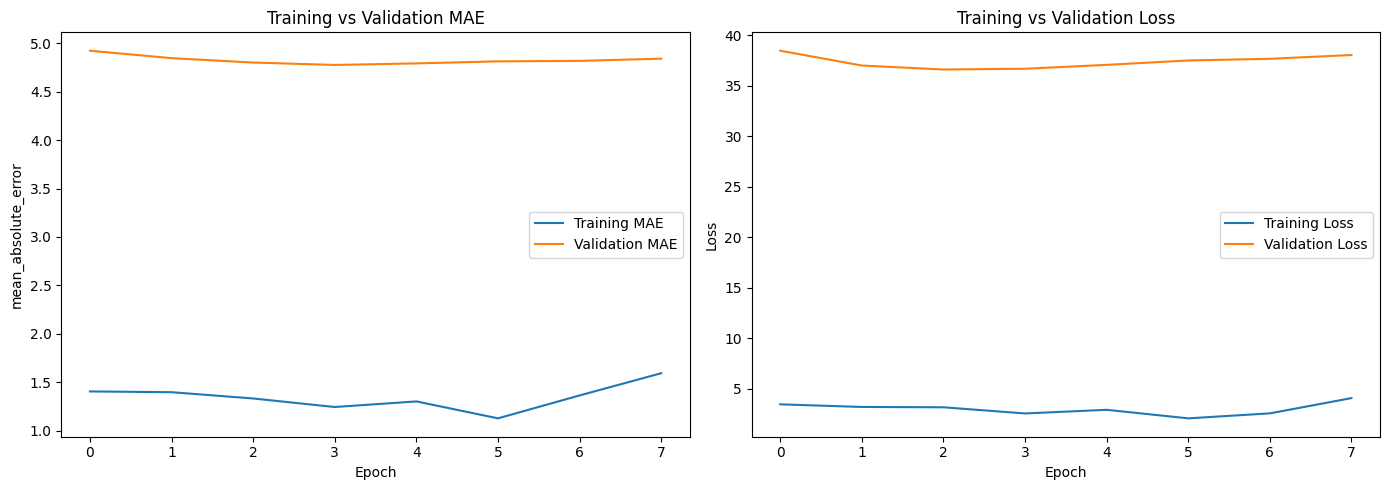

In [16]:
import matplotlib.pyplot as plt

# Assume 'history' is the object returned by your call to model.fit(...)

# Plot training and validation accuracy
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('mean_absolute_error')
plt.title('Training vs Validation MAE')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


## Predicting for the match

In [60]:
teamA_players = [vitalii_zhebrakovksy, loginov_dmitrii, ivan, andrey_spiridonov, andrey_larionov, andrey_trubicin, veselin]   # player IDs for Team A
teamB_players = [sanya, roman, denys, andrey_spiridonov, andrey_selifonov, oleksandr, alex_akimov]      # player IDs for Team B
teamA_players

[15, 17, 13, 1, 3, 2, 4]

In [61]:

MAX_TEAM_SIZE = 9  # Should match model's expected size

# Pad teams to MAX_TEAM_SIZE with 0 (mask token)
def pad_team(players, max_size):
    padded = players + [0]*(max_size - len(players))
    return np.array(padded)

teamA_input = pad_team(teamA_players, MAX_TEAM_SIZE)
teamB_input = pad_team(teamB_players, MAX_TEAM_SIZE)

# Add batch dimension: shape (1, MAX_TEAM_SIZE)
teamA_input = np.expand_dims(teamA_input, axis=0)
teamB_input = np.expand_dims(teamB_input, axis=0)

# Predict using the trained model
prediction = model.predict([teamA_input, teamB_input])
print(prediction)
# If model output is sigmoid probability of Team A win:
# prob_teamA_wins = prediction[0][0]

# print(f"Predicted probability that Team A wins: {prob_teamA_wins:.3f}")

# # Optional: Decide class label
# predicted_label = 1 if prob_teamA_wins > 0.5 else 0
# print("Predicted winner:", "Team A" if predicted_label == 1 else "Team B")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
[[-0.13870883]]


In [244]:

# teamA_pls = teamA_players
# print(" Team A players: ", teamA_pls)
# teamA_str = player_strengths[teamA_pls]
# print(f" Team A palyers' stregths:{teamA_str}, Total: {teamA_str.sum()}")

# teamB_pls = teamB_players
# print(" Team B players: ", teamB_pls)
# teamB_str = player_strengths[teamB_pls]
# print(f" Team B palyers' stregths:{teamB_str}, Total: {teamB_str.sum()}")
# # print(" Label (Team A wins=1):", labels[i])

In [67]:
# outcome = teamA_strength - teamB_strength
# competition_res = 1 if outcome > 0 else 0
# competition_res

## Extracting embeddings of players

In [53]:
# Direct reference to layer
player_embeddings = player_embedding.get_weights()[0]
print(player_embeddings.shape)  # (NUM_PLAYERS, PLAYER_EMB_DIM)

(32, 32)


In [54]:
print(player_embedding.input_dim)  # should show actual input_dim in the model
print(player_embedding.embeddings.shape)  

32
(32, 32)


In [55]:
player_embeddings[0, :] # why embeddings for player 0 are being learned?

array([ 0.04191646,  0.01750091, -0.03810655, -0.04407998, -0.02531474,
        0.03816222, -0.03449935,  0.01194894, -0.03120314,  0.01341735,
        0.03350885, -0.00200235, -0.04191852, -0.04525606, -0.00487887,
        0.00514221, -0.03325051, -0.02482355, -0.01707902,  0.0005273 ,
       -0.03210484, -0.02773686, -0.00672875, -0.03909703,  0.0043079 ,
        0.00924572,  0.02557483,  0.00043425,  0.03328383,  0.02851425,
       -0.02367504,  0.02932754], dtype=float32)

In [56]:
player_embeddings = player_embeddings[1:, :]

In [57]:
player_embeddings.shape

(31, 32)

## Try to initialize embeddings based on content based similarity.

TODO Use MPS(not sure) manifold approach to get initial embeddings

## UMAP and visualizing players in 3D

In [123]:
import numpy as np
import umap
import matplotlib.pyplot as plt
import plotly.graph_objs as go

# Generate test embeddings and labels (replace these with actual data)
np.random.seed(42)
labels_points = [f'{name}' for name in team_members_with_ids.values()]


# Embed to 3D
reducer = umap.UMAP(n_components=3, random_state=42)
embeddings_3d = reducer.fit_transform(player_embeddings)

x_emb = embeddings_3d[:, 0]
y_emb = embeddings_3d[:, 1]
z_emb = embeddings_3d[:, 2]

x_min = np.min(x_emb)
x_max = np.max(x_emb)
y_min = np.min(y_emb)
y_max = np.max(y_emb)
z_min = np.min(z_emb)
z_max = np.max(z_emb)

# Create interactive 3D scatter plot
scatter = go.Scatter3d(
        x=x_emb,
        y=y_emb,
        z=z_emb,
        # mode='markers',
        mode='markers+text',
        marker=dict(
            size=7,
            color=player_strengths_estimates,       # Color by this array
            colorscale='Viridis',         # Choose a colorscale
            colorbar=dict(title='Strength'),
            opacity=0.8
        ),
        text=labels_points,          # Hover labels
        hoverinfo='text'
    )
print(f"x_min: {x_min} x_max: {x_max}")
print(f"y_min: {y_min} y_max: {y_max}")
print(f"z_min: {z_min} z_max: {z_max}")


# Define the 3 corners of the triangle in 3D
x_m = [x_min, x_min, x_max, x_max,]  # Replace with your corner x coordinates
y_m = [y_min ,y_max, y_max, y_min]  # Replace with your corner y coordinates
z_m = [(z_max + z_min) / 2 , z_min, (z_max + z_min) / 2 , z_max]  # Replace with your corner z coordinates


# Define two triangles that form the rhombus
i = [0, 0]  # first vertices of triangles
j = [1, 2]  # second vertices of triangles
k = [2, 3]  # third vertices of triangles

# Create the Mesh3d object representing the triangle surface
triangle_surface = go.Mesh3d(
    x=x_m,
    y=y_m,
    z=z_m,
    i=i,
    j=j,
    k=k,
    color='lightblue',
    opacity=0.5,
    name='Rhombus'
)

# fig = go.Figure(data=[scatter, quivers])
fig = go.Figure(data=[triangle_surface, scatter])


fig.update_layout(
    title="3D UMAP projection of player embeddings",
    width=1000,             # <-- Change this to your desired width in pixels
    height=900,  
    scene=dict(
        xaxis_title="X",
        yaxis_title="Y",
        zaxis_title="Z"
    )
)

fig.show()


x_min: 1.8263641595840454 x_max: 4.172611713409424
y_min: 5.402998924255371 y_max: 7.635038375854492
z_min: 3.017019033432007 z_max: 5.376616954803467


/opt/anaconda3/envs/footballman/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [90]:
import numpy as np
from scipy.stats import pearsonr

# Assuming these variables from your setup:
# player_strengths: numpy array of shape (num_players,)
# embeddings_3d: numpy array of shape (num_players, 3) -- UMAP 3D projections

num_players = player_strengths_estimates.shape[0]
correlations = []
print(player_strengths_estimates.shape)
print(embeddings_3d.shape)
for dim in range(3):
    corr, p_value = pearsonr(embeddings_3d[:, dim], player_strengths_estimates)
    correlations.append((corr, p_value))
    print(f"Dimension {dim + 1} correlation with base strengths: r = {corr:.4f}, p-value = {p_value:.4g}")

# Optionally, compute average absolute correlation across all 3 dimensions
avg_abs_corr = np.mean([abs(c[0]) for c in correlations])
print(f"Average absolute correlation across 3 components: {avg_abs_corr:.4f}")


(31,)
(31, 3)
Dimension 1 correlation with base strengths: r = 0.1927, p-value = 0.2991
Dimension 2 correlation with base strengths: r = -0.2230, p-value = 0.2278
Dimension 3 correlation with base strengths: r = -0.1045, p-value = 0.5758
Average absolute correlation across 3 components: 0.1734


In [ ]:
# TODO
# 1. how vector embeddings initialisation affects results?
# 2. add scores statistics for the player to speedup learning